In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv("accounts.csv")
df1.shape

(97, 3)

In [3]:
df1.head()

,Account,Revenue,Employees
0,Sunnamplex,4592.96,13938.0
1,Silis,5339.57,18053.0
2,Groovestreet,2728.86,6486.0
3,Donware,2009.52,3409.0
4,Wonka Industries,4962.27,4687.0


In [4]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Revenue,97.0,1663.317629,1470.744287,14.79,431.1,1244.71,2356.07,6085.6
Employees,97.0,4183.113402,4404.266830,26.00,854.0,2695.00,6364.00,20587.0


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Account    97 non-null     object 
 1   Revenue    97 non-null     float64
 2   Employees  97 non-null     float64
dtypes: float64(2), object(1)
memory usage: 2.4+ KB


In [8]:
df1.isnull().sum()

Account      0
Revenue      0
Employees    0
dtype: int64

# Univariate Analysis

### Numerical Columns

In [10]:
df1.select_dtypes(include=np.number).columns

Index(['Revenue', 'Employees'], dtype='object')

In [11]:
plt.rcParams['figure.figsize']=[15,8]

C:\Users\Dell\AppData\Local\Temp\ipykernel_18992\1407995150.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1.loc[:,i],kde=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_18992\1407995150.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1.loc[:,i],kde=True)


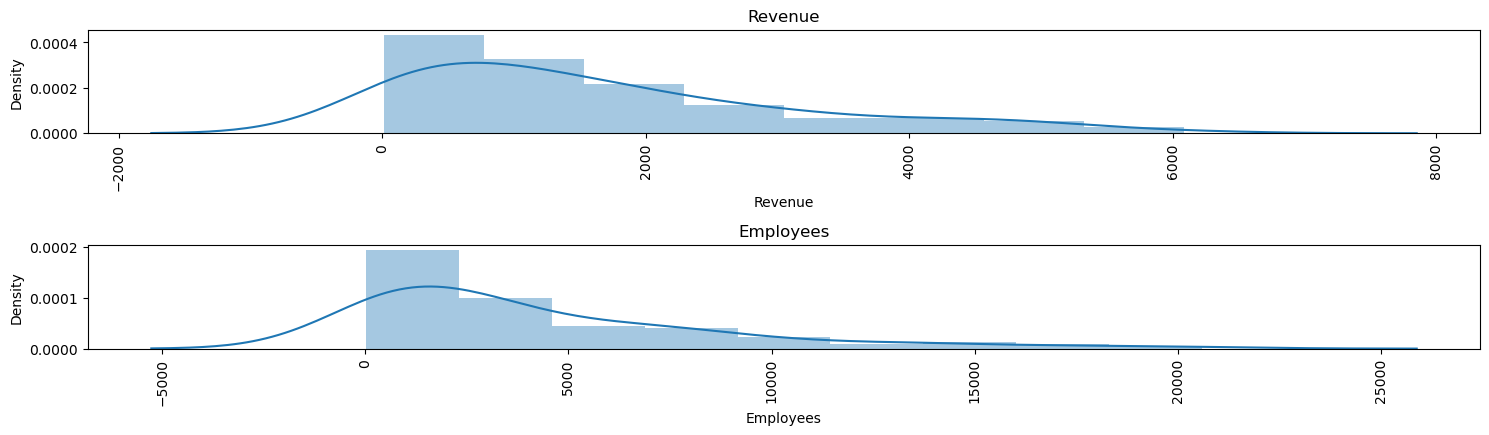

In [13]:
cols=['Revenue', 'Employees']
rows=4
columns=1
iterator=1
for i in cols:
    plt.subplot(rows,columns,iterator)
    sns.distplot(df1.loc[:,i],kde=True)
    plt.title(i)
    iterator=iterator+1
    plt.xticks(rotation=90)
    
plt.tight_layout()
plt.show()

In [14]:
df1.select_dtypes(include=object).columns

Index(['Account'], dtype='object')

In [15]:
plt.rcParams['figure.figsize']=[15,8]

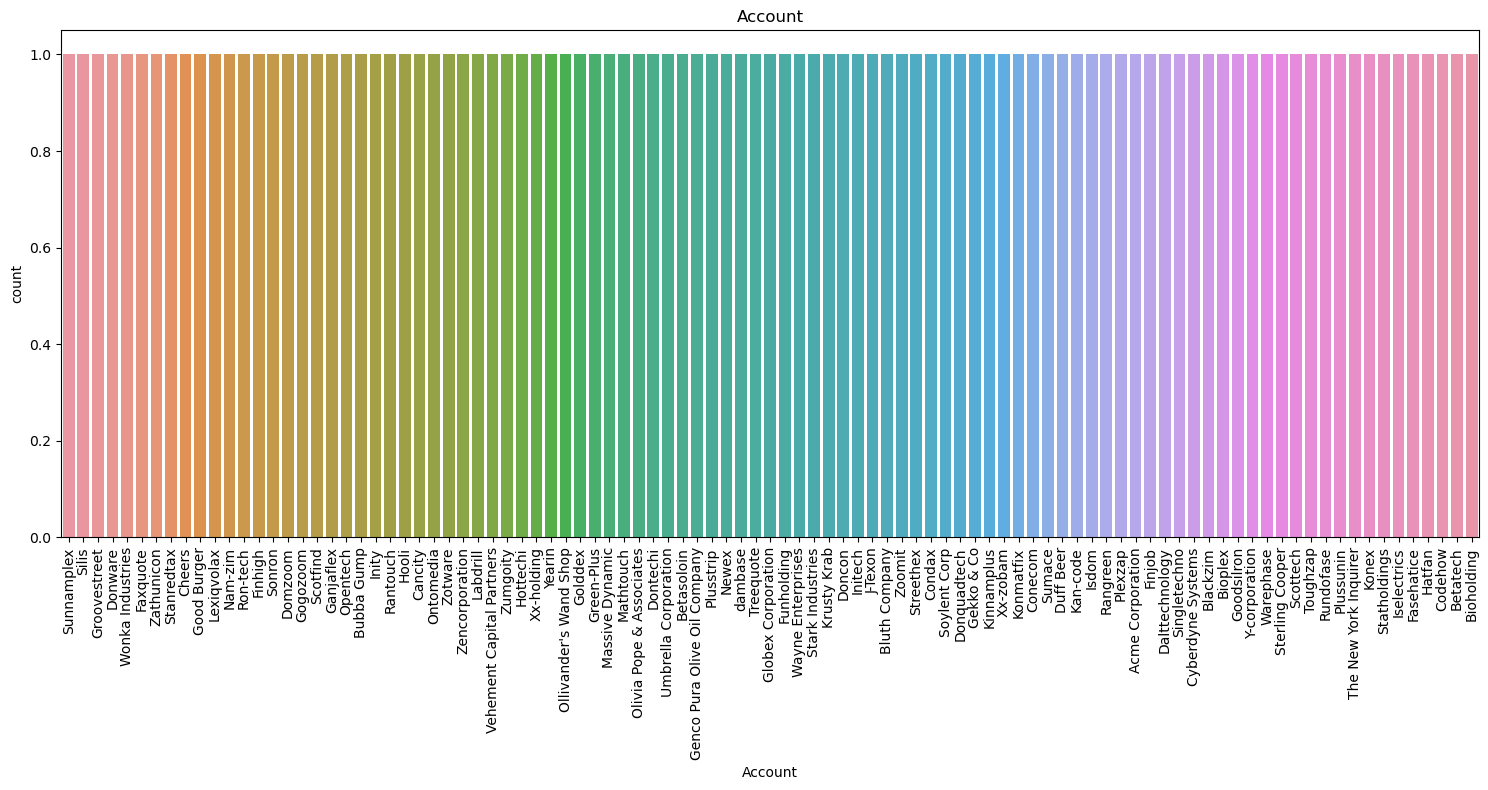

In [18]:
cols = ['Account']
rows = 1
columns = 1
iterator = 1

for i in cols:
    plt.subplot(rows, columns, iterator)
    sns.countplot(data=df1, x=i)  # Use 'data=df1' to specify the DataFrame
    plt.title(i)
    iterator += 1
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

# Bivariate Analysis

### Categorical Vs Numerical Columns

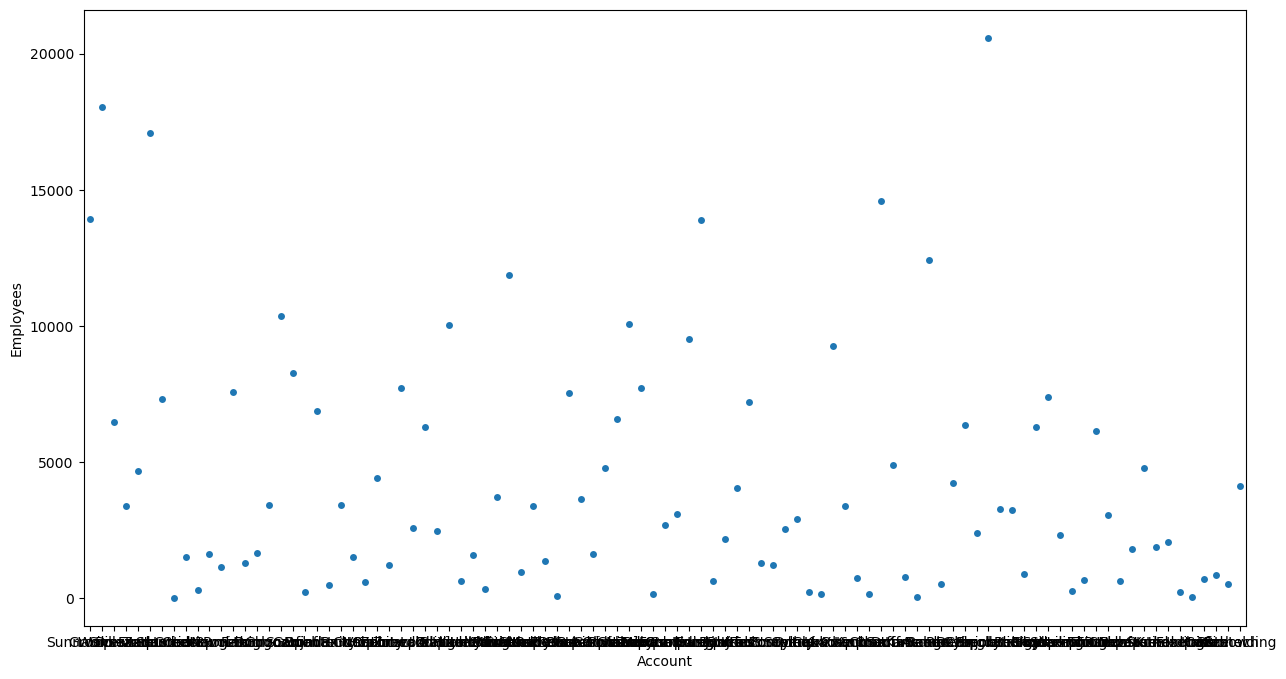

In [19]:
sns.stripplot(x='Account', y='Employees', data=df1)
plt.show()

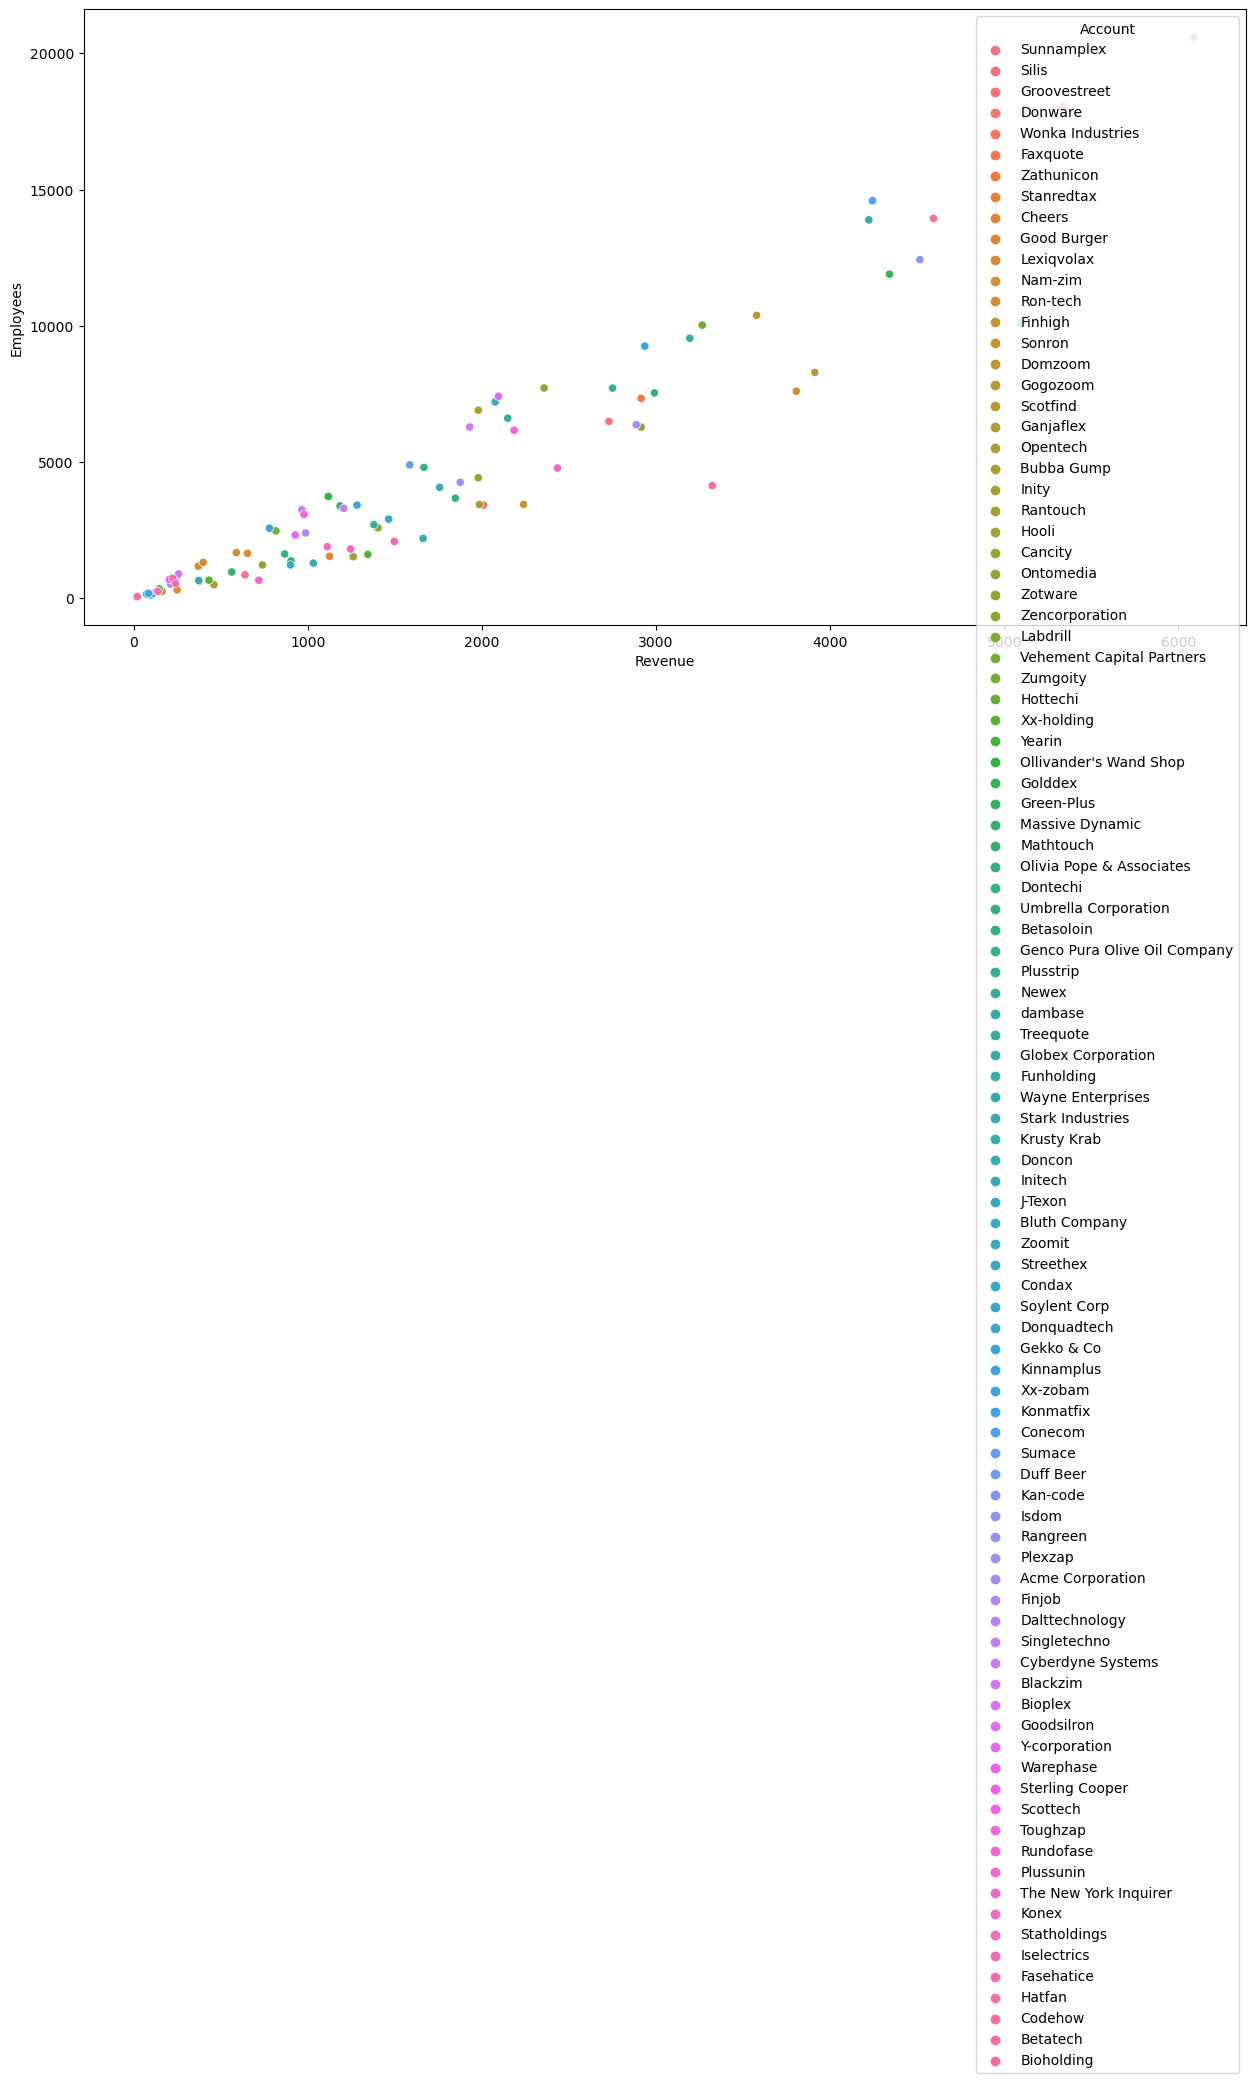

In [21]:
sns.scatterplot(x='Revenue', y='Employees', hue='Account', data=df1)
plt.show()

### Multivariate Analysis

C:\Users\Dell\AppData\Local\Temp\ipykernel_18992\1053158861.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(), annot=True)


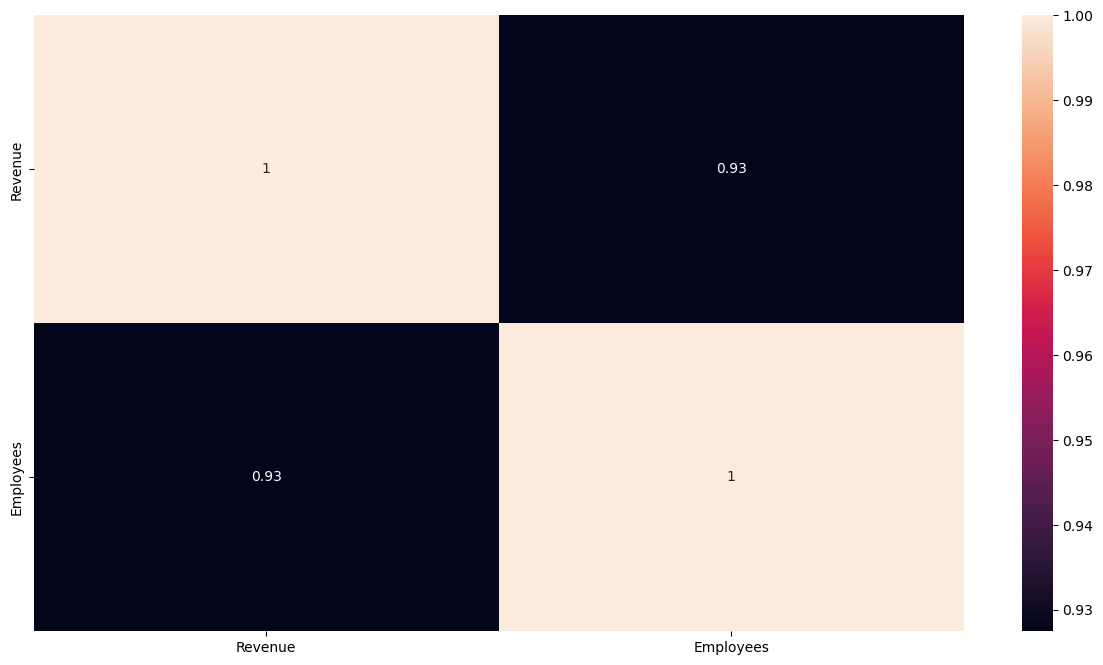

In [22]:
sns.heatmap(df1.corr(), annot=True)

plt.show()

### Outliers Treatment

<Axes: >

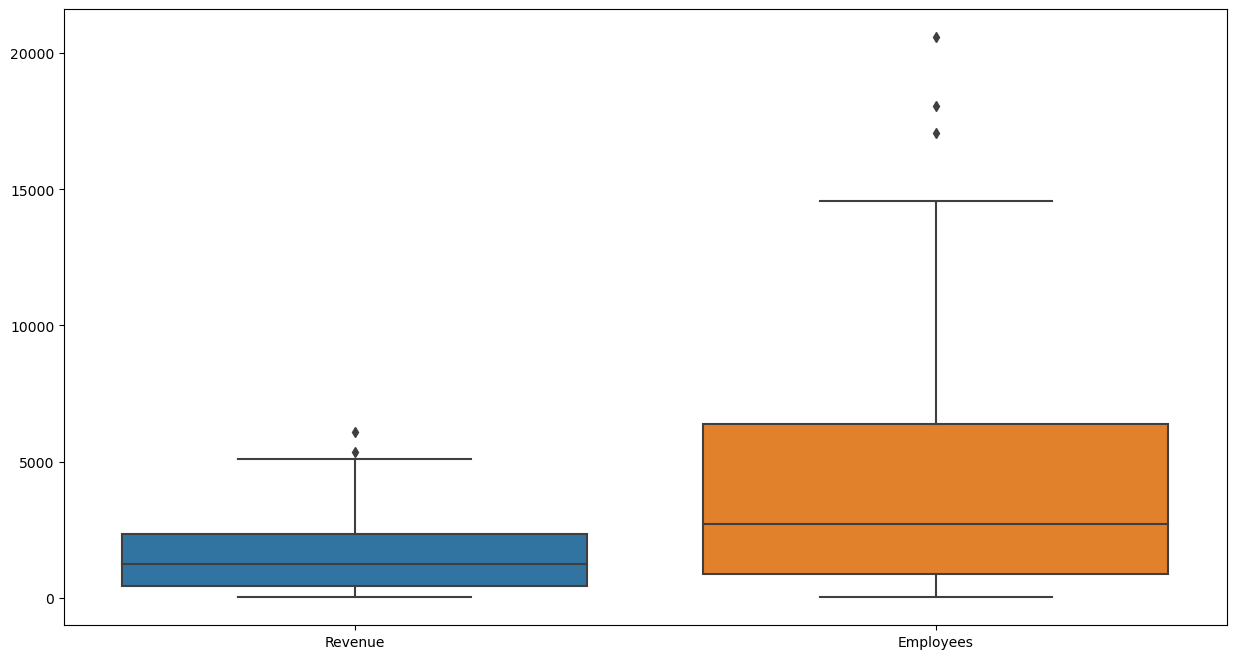

In [23]:
sns.boxplot(data=df1)

# **Inference**
* We can see that revenueand employess has outliers

#### **Inference**
* From the above graph we can see that there noise in two features.
* Therefore we will use 3*iqr so that we will remove outliers like noise rather than the pattern

In [24]:
check = df1[['Revenue', 'Employees','Account']]

q1 = check.quantile(0.25)
q3 = check.quantile(0.75)
iqr = q3 - q1

ll = q1 - 3*iqr
ul = q3 + 3*iqr

df = df1[~((check<ll)|(check>ul)).any(axis=1)]
df.shape

C:\Users\Dell\AppData\Local\Temp\ipykernel_18992\2008872652.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q1 = check.quantile(0.25)
C:\Users\Dell\AppData\Local\Temp\ipykernel_18992\2008872652.py:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q3 = check.quantile(0.75)
C:\Users\Dell\AppData\Local\Temp\ipykernel_18992\2008872652.py:10: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df1[~((check<ll)|(check>ul)).any(axis=1)]


(97, 3)

(array([1, 2]), [Text(1, 0, 'Revenue'), Text(2, 0, 'Employees')])

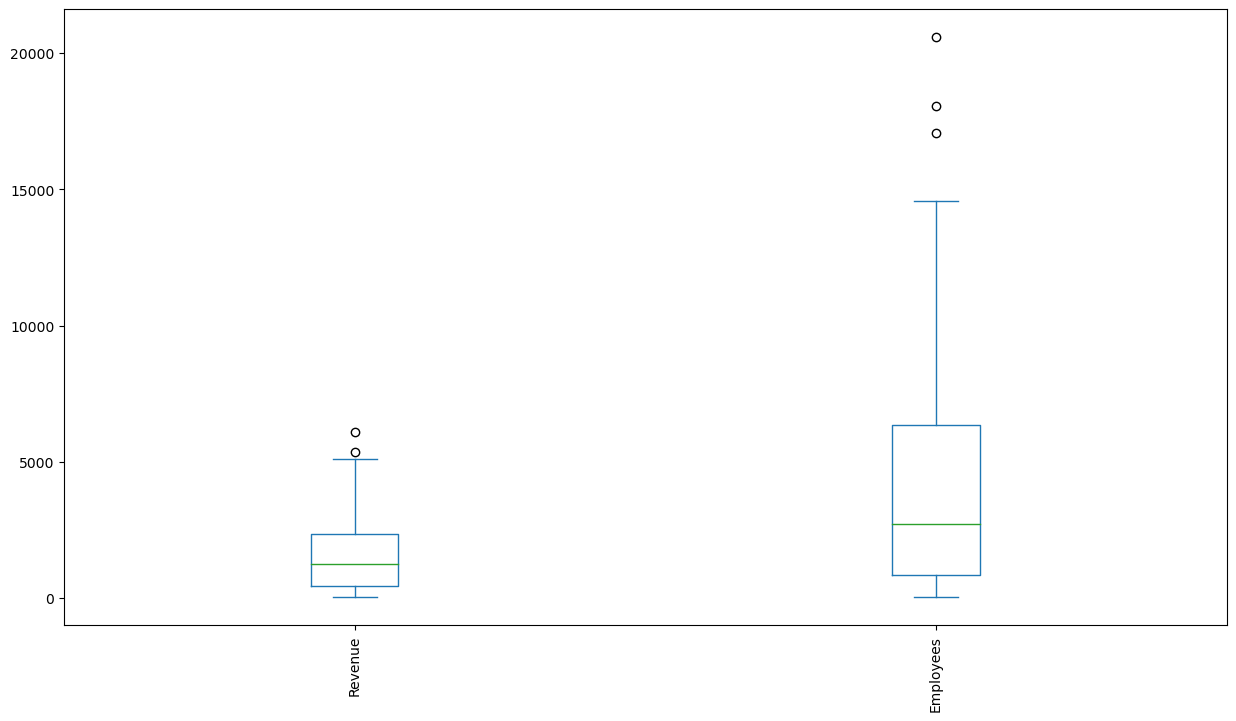

In [25]:
df.plot(kind='box')
plt.xticks(rotation=90)

**Inference**
* From the above graph we can see that noise has been removed but the pattern is still there.